#### Logistic Regression   
While this model is not specifically part of the syllabus,  
understanding it will help in learning  
- Classifiers and    
- Nural Network.   
   
Logistic Regression is <u>used mostly for binary classification</u>.     
training = classification = fit()   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Label encoding converts the categorical data into numerical ones, but it assigns a unique number(starting from 0) to each class of data.   
This may lead to the generation of priority issues during model training of data sets.  
A label with a high value may be considered to have high priority than a label having a lower value.  

In most scenarios, k-1 or one hot encoding is the preferred way to convert a categorical variable into a numeric variable  
because label encoding makes it seem that there is a ranking between values.  

the example file 'Police' column indicates if the police was called due to unruly customer behavior.  
The column has encoded labels - 0/1.  

In [2]:
df = pd.read_csv('../Data/police.csv')
df.head()

,Reservations,Temperature,Tourists,Police
0,13,26,9,1
1,2,14,6,0
2,14,20,3,1
3,23,25,9,1
4,13,24,8,1


#### Linear Regression   
Seaborn regplot directly plots linear regression between two variables.  
**Seen Below**   
When the target is categorical, linear regression is a poor choice.   
<u>We have also seen earlier that outliers badly impact linear regression</u>  

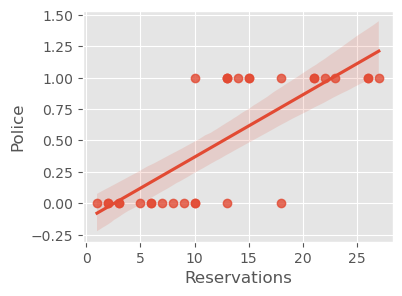

In [3]:
plt.figure(figsize=(4,3))
sns.regplot(data=df, x="Reservations", y="Police");

#### Sigmoids   
In linear regression   
$$\hat{y} = x_1*w_1 + x_2*w2 + x_3*w_3$$   
Here, $\hat{y}$ could take any value. 

Binary classification result can be only true or false (0 or 1)   

First step,   
Logistic function Sigmoid transforms a value to fit in a range of 0 to 1 and also gives in a smooth curve.   

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [5]:
for i in range(-5, 6):
    print(f"{i:2}  {sigmoid(i)}")

-5  0.0066928509242848554
-4  0.01798620996209156
-3  0.04742587317756678
-2  0.11920292202211755
-1  0.2689414213699951
 0  0.5
 1  0.7310585786300049
 2  0.8807970779778823
 3  0.9525741268224334
 4  0.9820137900379085
 5  0.9933071490757153


#### Plot sigmoid - demo   

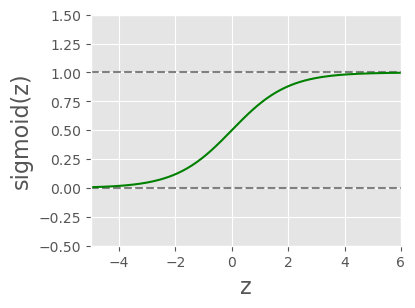

In [6]:
MARGIN_LEFT = -5
MARGIN_RIGHT = 6
plt.figure(figsize=(4,3))
# Configure axes
plt.axis([MARGIN_LEFT, MARGIN_RIGHT, -0.5, 1.5])

# Plot margins
plt.plot([MARGIN_LEFT, MARGIN_RIGHT], [1, 1], color="grey", linestyle="dashed")
plt.plot([MARGIN_LEFT, MARGIN_RIGHT], [0, 0], color="grey", linestyle="dashed")

# Plot sigmoid
X = np.linspace(MARGIN_LEFT, MARGIN_RIGHT, 200)
Y = [sigmoid(x) for x in X]
plt.xlabel("z", fontsize=16)
plt.ylabel("sigmoid(z)", fontsize=16)
plt.plot(X, Y, color="g");

##### Forward propagation   
process of moving the data through the system  

The movement of data in the forward direction in ANN.  
For inference from a trained model we need only forward propagation.   
  
Backpropagation is for fine-tuning the weights of ANN based on the error rate (loss) from previous epoch (iteration.)   
```
def predict(X, w):
    return np.matmul(X, w)
```
to this function of linear regression,  
add a line to convert the result into a sigmoid.  

In [7]:
def predict(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

The result of predict() is $\hat{y}$ matrix where each element is constrained between 0 and 1.     
The confidence of prediction reduces as the value moves away from 1 or zero to 0.5.     
`classify()` function below rounds the $\hat{y}$ to get binary classification value.  

In [8]:
def classify(X, w):
    return np.round(predict(X, w))

In [9]:
print("\nNum  Sigmoid               Classified")
for i in range(-5, 6):
    print(f"{i:2}  {sigmoid(i):22}  {np.round(sigmoid(i)):4}")


Num  Sigmoid               Classified
-5   0.0066928509242848554   0.0
-4     0.01798620996209156   0.0
-3     0.04742587317756678   0.0
-2     0.11920292202211755   0.0
-1      0.2689414213699951   0.0
 0                     0.5   0.0
 1      0.7310585786300049   1.0
 2      0.8807970779778823   1.0
 3      0.9525741268224334   1.0
 4      0.9820137900379085   1.0
 5      0.9933071490757153   1.0


#### Log loss   
MSE as loss function with sigmoid can result in too many local minima.  
To avoid the problem, use log loss which smooths out the problem.  
Log Loss $L = -\frac{1}{m}\sum(y_i . log(\hat{y}_i) + (1 - y_i) . log(1 - \hat{y}_i))$

In [10]:
def loss(X, Y, w):
    y_hat = predict(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

#### Update Gradient   
$$\frac{\delta L}{\delta w} = \frac{1}{m}\sum x_i(\hat{y}_i - y_i)$$

In [11]:
def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X,w) - Y))/X.shape[0]

In [12]:
Y = np.array(Y).reshape(-1,1)
X = X.reshape(-1,1)
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
df = pd.read_csv('../Data/police.csv')
data = df.values
X = data[:,:3]
Y = data[:,3:]

In [14]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        w -= gradient(X, Y, w) * lr
    return w

w = train(X, Y, iterations=1000000, lr=0.01)

In [15]:
w

array([[ 0.52991428],
       [-0.37797943],
       [ 0.25699818]])

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(forward(X, w))

def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    data = []
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        data.append([i, w[0][0], w[1][0], w[2][0], loss(X,Y,w)])
        w -= gradient(X, Y, w) * lr
    return w, pd.DataFrame(data, columns= ['i', 'w1','w2','w3', 'loss'])

def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print(f"\nSuccess: {correct_results}/{total_examples} ({success_percent:.2f})") 
          

w, df = train(X, Y, iterations=10000, lr=0.001)

# Test 
test(X, Y, w)


Success: 25/30 (83.33)


#### Trained Model 

In [17]:
w

array([[ 0.52485388],
       [-0.37341771],
       [ 0.25145191]])

In [18]:
df[['w1','w2','w3', 'loss']]

,w1,w2,w3,loss
0,0.000000,0.000000,0.000000,0.693147
1,0.002900,0.001700,0.000300,0.682507
2,0.005518,0.003016,0.000503,0.674409
3,0.007899,0.004011,0.000625,0.668109
4,0.010081,0.004737,0.000680,0.663083
...,...,...,...,...
9995,0.524845,-0.373409,0.251442,0.378440
9996,0.524846,-0.373411,0.251444,0.378440
9997,0.524848,-0.373413,0.251446,0.378440
9998,0.524850,-0.373414,0.251448,0.378440


#### Progressive changes to weights and loss   

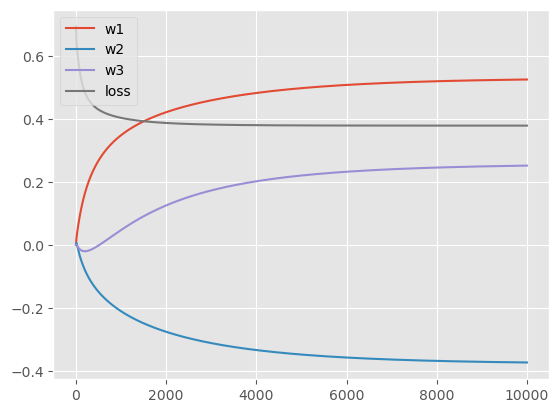

In [19]:
df[['w1','w2','w3', 'loss']].plot();